(**nissue:no qe symbol for both**)

# Cake Eating I: Introduction to Optimal Saving

## Contents

- [Cake Eating I: Introduction to Optimal Saving](#Cake-Eating-I:-Introduction-to-Optimal-Saving)  
  - [Overview](#Overview)  
  - [The Model](#The-Model)  
  - [The Value Function](#The-Value-Function)  
  - [The Optimal Policy](#The-Optimal-Policy)  
  - [The Euler Equation](#The-Euler-Equation)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

In this lecture we introduce a simple “cake eating” problem.

The intertemporal problem is: how much to enjoy today and how much to leave
for the future?

Although the topic sounds trivial, this kind of trade-off between current
and future utility is at the heart of many savings and consumption problems.

Once we master the ideas in this simple environment, we will apply them to
progressively more challenging—and useful—problems.

The main tool we will use to solve the cake eating problem is dynamic programming.

Readers might find it helpful to review the following lectures before reading this one:

- The [shortest paths lecture](https://python.quantecon.org/short_path.html)  
- The [basic McCall model](https://python.quantecon.org/mccall_model.html)  
- The [McCall model with separation](https://python.quantecon.org/mccall_model_with_separation.html)  
- The [McCall model with separation and a continuous wage distribution](https://python.quantecon.org/mccall_fitted_vfi.html)  


In what follows, we require the following imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Model

We consider an infinite time horizon $ t=0, 1, 2, 3.. $

At $ t=0 $ the agent is given a complete cake with size $ \bar x $.

Let $ x_t $ denote the size of the cake at the beginning of each period,
so that, in particular, $ x_0=\bar x $.

We choose how much of the cake to eat in any given period $ t $.

After choosing to consume $ c_t $ of the cake in period $ t $ there is

$$
x_{t+1} = x_t - c_t
$$

left in period $ t+1 $.

Consuming quantity $ c $ of the cake gives current utility $ u(c) $.

We adopt the CRRA utility function


<a id='equation-crra-utility'></a>
$$
u(c) = \frac{c^{1-\gamma}}{1-\gamma} \qquad (\gamma \gt 0, \, \gamma \neq 1) \tag{1}
$$

In Python this is

In [2]:
def u(c, γ):

    return c**(1 - γ) / (1 - γ)

Future cake consumption utility is discounted according to $ \beta\in(0, 1) $.

In particular, consumption of $ c $ units $ t $ periods hence has present value $ \beta^t u(c) $

The agent’s problem can be written as


<a id='equation-cake-objective'></a>
$$
\max_{\{c_t\}} \sum_{t=0}^\infty \beta^t u(c_t) \tag{2}
$$

subject to


<a id='equation-cake-feasible'></a>
$$
x_{t+1} = x_t - c_t
\quad \text{and} \quad
0\leq c_t\leq x_t \tag{3}
$$

for all $ t $.

A consumption path $ \{c_t\} $ satisfying [(28.3)](#equation-cake-feasible) where
$ x_0 = \bar x $ is called **feasible**.

In this problem, the following terminology is standard:

- $ x_t $ is called the **state variable**  
- $ c_t $ is called the **control variable** or the **action**  
- $ \beta $ and $ \gamma $ are **parameters**  

### Trade-Off

The key trade-off in the cake-eating problem is this:

- Delaying consumption is costly because of the discount factor.  
- But delaying some consumption is also attractive because $ u $ is concave.  


The concavity of $ u $ implies that the consumer gains value from
*consumption smoothing*, which means spreading consumption out over time.

This is because concavity implies diminishing marginal utility—a progressively smaller gain in utility for each additional spoonful of cake consumed within one period.

### Intuition

The reasoning given above suggests that the discount factor $ \beta $ and the curvature parameter $ \gamma $ will play a key role in determining the rate of consumption.

Here’s an educated guess as to what impact these parameters will have.

First, higher $ \beta $ implies less discounting, and hence the agent is more patient, which should reduce the rate of consumption.

(**nissue:math processing error**)

Second, higher $ \gamma $ implies that marginal utility $ u'(c) =
c^{-\gamma} $ falls faster with $ c $.

This suggests more smoothing, and hence a lower rate of consumption.

In summary, we expect the rate of consumption to be *decreasing in both
parameters*.

Let’s see if this is true.

## The Value Function

The first step of our dynamic programming treatment is to obtain the Bellman
equation.

The next step is to use it to calculate the solution.

### The Bellman Equation

To this end, we let $ v(x) $ be maximum lifetime utility attainable from
the current time when $ x $ units of cake are left.

That is,


<a id='equation-value-fun'></a>
$$
v(x) = \max \sum_{t=0}^{\infty} \beta^t u(c_t) \tag{4}
$$

where the maximization is over all paths $ \{ c_t \} $ that are feasible
from $ x_0 = x $.

At this point, we do not have an expression for $ v $, but we can still
make inferences about it.

For example, as was the case with the [McCall model](https://python.quantecon.org/mccall_model.html), the
value function will satisfy a version of the *Bellman equation*.

In the present case, this equation states that $ v $ satisfies


<a id='equation-bellman-cep'></a>
$$
v(x) = \max_{0\leq c \leq x} \{u(c) + \beta v(x-c)\}
\quad \text{for any given } x \geq 0. \tag{5}
$$

The intuition here is essentially the same it was for the McCall model.

Choosing $ c $ optimally means trading off current vs future rewards.

Current rewards from choice $ c $ are just $ u(c) $.

Future rewards given current cake size $ x $, measured from next period and
assuming optimal behavior, are $ v(x-c) $.

These are the two terms on the right hand side of [(28.5)](#equation-bellman-cep), after
suitable discounting.

If $ c $ is chosen optimally using this trade off strategy, then we obtain maximal lifetime rewards from our current state $ x $.

Hence, $ v(x) $ equals the right hand side of [(28.5)](#equation-bellman-cep), as claimed.

### An Analytical Solution

It has been shown that, with $ u $ as the CRRA utility function in
[(28.1)](#equation-crra-utility), the function


<a id='equation-crra-vstar'></a>
$$
v^*(x_t) = \left( 1-\beta^{1/\gamma} \right)^{-\gamma}u(x_t) \tag{6}
$$

solves the Bellman equation and hence is equal to the value function.

You are asked to confirm that this is true in the exercises below.

The solution [(28.6)](#equation-crra-vstar) depends heavily on the CRRA utility function.

In fact, if we move away from CRRA utility, usually there is no analytical
solution at all.

In other words, beyond CRRA utility, we know that the value function still
satisfies the Bellman equation, but we do not have a way of writing it
explicitly, as a function of the state variable and the parameters.

We will deal with that situation numerically when the time comes.

Here is a Python representation of the value function:

In [3]:
def v_star(x, β, γ):

    return (1 - β**(1 / γ))**(-γ) * u(x, γ)

And here’s a figure showing the function for fixed parameters:

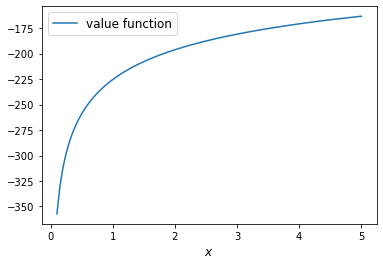

In [4]:
β, γ = 0.95, 1.2
x_grid = np.linspace(0.1, 5, 100)

fig, ax = plt.subplots()

ax.plot(x_grid, v_star(x_grid, β, γ), label='value function')

ax.set_xlabel('$x$', fontsize=12)
ax.legend(fontsize=12)

plt.show()

## The Optimal Policy

Now that we have the value function, it is straightforward to calculate the
optimal action at each state.

We should choose consumption to maximize the
right hand side of the Bellman equation [(28.5)](#equation-bellman-cep).

$$
c^* = \arg \max_{c} \{u(c) + \beta v(x - c)\}
$$

We can think of this optimal choice as a function of the state $ x $, in
which case we call it the **optimal policy**.

We denote the optimal policy by $ \sigma^* $, so that

$$
\sigma^*(x) := \arg \max_{c} \{u(c) + \beta v(x - c)\}
\quad \text{for all } x
$$

If we plug the analytical expression [(28.6)](#equation-crra-vstar) for the value function
into the right hand side and compute the optimum, we find that


<a id='equation-crra-opt-pol'></a>
$$
\sigma^*(x) = \left( 1-\beta^{1/\gamma} \right) x \tag{7}
$$

Now let’s recall our intuition on the impact of parameters.

We guessed that the consumption rate would be decreasing in both parameters.

This is in fact the case, as can be seen from [(28.7)](#equation-crra-opt-pol).

Here’s some plots that illustrate.

In [5]:
def c_star(x, β, γ):

    return (1 - β ** (1/γ)) * x

Continuing with the values for $ \beta $ and $ \gamma $ used above, the
plot is

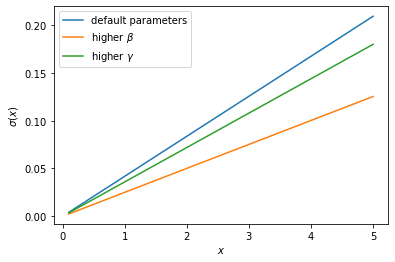

In [6]:
fig, ax = plt.subplots()
ax.plot(x_grid, c_star(x_grid, β, γ), label='default parameters')
ax.plot(x_grid, c_star(x_grid, β + 0.02, γ), label=r'higher $\beta$')
ax.plot(x_grid, c_star(x_grid, β, γ + 0.2), label=r'higher $\gamma$')
ax.set_ylabel(r'$\sigma(x)$')
ax.set_xlabel('$x$')
ax.legend()

plt.show()

## The Euler Equation

In the discussion above we have provided a complete solution to the cake
eating problem in the case of CRRA utility.

There is in fact another way to solve for the optimal policy, based on the
so-called **Euler equation**.

Although we already have a complete solution, now is a good time to study the
Euler equation.

This is because, for more difficult problems, this equation
provides key insights that are hard to obtain by other methods.

### Statement and Implications

The Euler equation for the present problem can be stated as


<a id='equation-euler-cep'></a>
$$
u^{\prime} (c^*_{t})=\beta u^{\prime}(c^*_{t+1}) \tag{8}
$$

This is (**Issue:a**) necessary condition for the optimal path.

It says that, along the optimal path, marginal rewards are equalized across time, after appropriate discounting.

This makes sense: optimality is obtained by smoothing consumption up to the
point where no marginal gains remain.

We can also state the Euler equation in terms of the policy function.

A **feasible consumption policy** is a map $ x \mapsto \sigma(x) $
satisfying $ 0 \leq \sigma(x) \leq x $.

The last restriction says that we cannot consume more than the remaining
quantity of cake.

A feasible consumption policy $ \sigma $ is said to **satisfy the Euler equation** if, for
all $ x > 0 $,


<a id='equation-euler-pol'></a>
$$
u^{\prime}( \sigma(x) )
= \beta u^{\prime} (\sigma(x - \sigma(x))) \tag{9}
$$

Evidently [(28.9)](#equation-euler-pol) is just the policy equivalent of [(28.8)](#equation-euler-cep).

It turns out that a feasible policy is optimal if and
only if it satisfies the Euler equation.

In the exercises, you are asked to verify that the optimal policy
[(28.7)](#equation-crra-opt-pol) does indeed satisfy this functional equation.

>**Note**
>
>A **functional equation** is an equation where the unknown object is a function.

For a proof of sufficiency of the Euler equation in a very general setting,
see proposition 2.2 of [[MST20]](https://python.quantecon.org/zreferences.html#ma2020income).

The following arguments focus on necessity, explaining why an optimal path or
policy should satisfy the Euler equation.

### Derivation I: A Perturbation Approach

Let’s write $ c $ as a shorthand for consumption path $ \{c_t\}_{t=0}^\infty $.

The overall cake-eating maximization problem can be written as

$$
\max_{c \in F} U(c)
\quad \text{where } U(c) := \sum_{t=0}^\infty \beta^t u(c_t)
$$

and $ F $ is the set of feasible consumption paths.

We know that differentiable functions have a zero gradient at a maximizer.

So the optimal path $ c^* := \{c^*_t\}_{t=0}^\infty $ must satisfy
$ U'(c^*) = 0 $.

>**Note**
>
>If you want to know exactly how the derivative $ U'(c^*) $ is
defined, given that the argument $ c^* $ is a vector of infinite
length, you can start by learning about [Gateaux derivatives](https://en.wikipedia.org/wiki/Gateaux_derivative). However, such
knowledge is not assumed in what follows.

In other words, the rate of change in $ U $ must be zero for any
infinitesimally small (and feasible) perturbation away from the optimal path.

So consider a feasible perturbation that reduces consumption at time $ t $ to
$ c^*_t - h $
and increases it in the next period to $ c^*_{t+1} + h $.

Consumption does not change in any other period.

We call this perturbed path $ c^h $.

By the preceding argument about zero gradients, we have

$$
\lim_{h \to 0} \frac{U(c^h) - U(c^*)}{h} = U'(c^*) = 0
$$

Recalling that consumption only changes at $ t $ and $ t+1 $, this
becomes

$$
\lim_{h \to 0}
\frac{\beta^t u(c^*_t - h) + \beta^{t+1} u(c^*_{t+1} + h)
      - \beta^t u(c^*_t) - \beta^{t+1} u(c^*_{t+1}) }{h} = 0
$$

After rearranging, the same expression can be written as

$$
\lim_{h \to 0}
    \frac{u(c^*_t - h) - u(c^*_t) }{h}
+ \lim_{h \to 0}
    \frac{ \beta u(c^*_{t+1} + h) - u(c^*_{t+1}) }{h} = 0
$$

or, taking the limit,

$$
- u'(c^*_t) + \beta u'(c^*_{t+1}) = 0
$$

This is just the Euler equation.

### Derivation II: Using the Bellman Equation

Another way to derive the Euler equation is to use the Bellman equation [(28.5)](#equation-bellman-cep).

Taking the derivative on the right hand side of the Bellman equation with
respect to $ c $ and setting it to zero, we get


<a id='equation-bellman-foc'></a>
$$
u^{\prime}(c)=\beta v^{\prime}(x - c) \tag{10}
$$

To obtain $ v^{\prime}(x - c) $, we set
$ g(c,x) = u(c) + \beta v(x - c) $, so that, at the optimal choice of
consumption,


<a id='equation-bellman-equality'></a>
$$
v(x) = g(c,x) \tag{11}
$$

Differentiating both sides while acknowledging that the maximizing consumption will depend
on $ x $, we get

$$
v' (x) =
\frac{\partial }{\partial c} g(c,x) \frac{\partial c}{\partial x}
 + \frac{\partial }{\partial x} g(c,x)
$$

When $ g(c,x) $ is maximized at $ c $, we have $ \frac{\partial }{\partial c} g(c,x) = 0 $.

Hence the derivative simplifies to


<a id='equation-bellman-envelope'></a>
$$
v' (x) =
\frac{\partial g(c,x)}{\partial x}
= \frac{\partial }{\partial x} \beta v(x - c)
= \beta v^{\prime}(x - c) \tag{12}
$$

(This argument is an example of the [Envelope Theorem](https://en.wikipedia.org/wiki/Envelope_theorem).)

But now an application of [(28.10)](#equation-bellman-foc) gives


<a id='equation-bellman-v-prime'></a>
$$
u^{\prime}(c) = v^{\prime}(x) \tag{13}
$$

Thus, the derivative of the value function is equal to marginal utility.

Combining this fact with [(28.12)](#equation-bellman-envelope) recovers the Euler equation.

## Exercises

### Exercise 1

How does one obtain the expressions for the value function and optimal policy
given in [(28.6)](#equation-crra-vstar) and [(28.7)](#equation-crra-opt-pol) respectively?

The first step is to make a guess of the functional form for the consumption
policy.

So suppose that we do not know the solutions and start with a guess that the
optimal policy is linear.

In other words, we conjecture that there exists a positive $ \theta $ such that setting $ c_t^*=\theta x_t $ for all $ t $ produces an optimal path.

Starting from this conjecture, try to obtain the solutions [(28.6)](#equation-crra-vstar) and [(28.7)](#equation-crra-opt-pol).

In doing so, you will need to use the definition of the value function and the
Bellman equation.

## Solutions

### Exercise 1

We start with the conjecture $ c_t^*=\theta x_t $, which leads to a path
for the state variable (cake size) given by

$$
x_{t+1}=x_t(1-\theta)
$$

Then $ x_t = x_{0}(1-\theta)^t $ and hence

$$
\begin{aligned}
v(x_0)
   & = \sum_{t=0}^{\infty} \beta^t u(\theta x_t)\\
   & = \sum_{t=0}^{\infty} \beta^t u(\theta x_0 (1-\theta)^t ) \\
   & = \sum_{t=0}^{\infty} \theta^{1-\gamma} \beta^t (1-\theta)^{t(1-\gamma)} u(x_0) \\
   & = \frac{\theta^{1-\gamma}}{1-\beta(1-\theta)^{1-\gamma}}u(x_{0})
\end{aligned}
$$

From the Bellman equation, then,

$$
\begin{aligned}
    v(x) & = \max_{0\leq c\leq x}
        \left\{
            u(c) +
            \beta\frac{\theta^{1-\gamma}}{1-\beta(1-\theta)^{1-\gamma}}\cdot u(x-c)
        \right\} \\
         & = \max_{0\leq c\leq x}
            \left\{
                \frac{c^{1-\gamma}}{1-\gamma} +
                \beta\frac{\theta^{1-\gamma}}
                {1-\beta(1-\theta)^{1-\gamma}}
                \cdot\frac{(x-c)^{1-\gamma}}{1-\gamma}
            \right\}
\end{aligned}
$$

From the first order condition, we obtain

$$
c^{-\gamma} + \beta\frac{\theta^{1-\gamma}}{1-\beta(1-\theta)^{1-\gamma}}\cdot(x-c)^{-\gamma}(-1) = 0
$$

or

$$
c^{-\gamma} = \beta\frac{\theta^{1-\gamma}}{1-\beta(1-\theta)^{1-\gamma}}\cdot(x-c)^{-\gamma}
$$

With $ c = \theta x $ we get

$$
\left(\theta x\right)^{-\gamma} =  \beta\frac{\theta^{1-\gamma}}{1-\beta(1-\theta)^{1-\gamma}}\cdot(x(1-\theta))^{-
\gamma}
$$

Some rearrangement produces

$$
\theta = 1-\beta^{\frac{1}{\gamma}}
$$

This confirms our earlier expression for the optimal policy:

$$
c_t^* = \left(1-\beta^{\frac{1}{\gamma}}\right)x_t
$$

Substituting $ \theta $ into the value function above gives

$$
v^*(x_t) = \frac{\left(1-\beta^{\frac{1}{\gamma}}\right)^{1-\gamma}}
{1-\beta\left(\beta^{\frac{{1-\gamma}}{\gamma}}\right)} u(x_t) \\
$$

Rearranging gives

$$
v^*(x_t) = \left(1-\beta^\frac{1}{\gamma}\right)^{-\gamma}u(x_t)
$$

Our claims are now verified.